In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///..//Resources//hawaii.sqlite")


In [11]:
# reflect an existing database into a new model
Base = automap_base()



#Hawaii = Base.classes.hawaii

# reflect the tables


In [4]:
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
query_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The most recent date in the data set is {query_date[0]}.")

The most recent date in the data set is 2017-08-23.


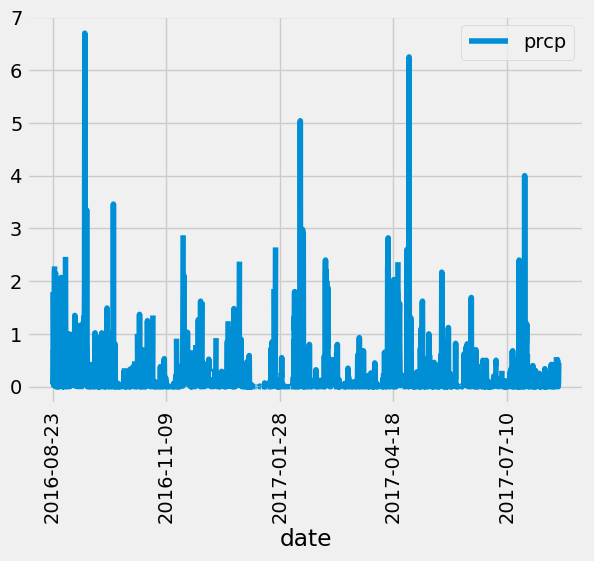

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#query_last_date = session.query(measurement.date).order_by(measurement.date.asc()).first()
#print(query_last_date)

# Perform a query to retrieve the data and precipitation scores
query_last_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
all_prcp = pd.DataFrame(query_last_year, columns=['date', 'prcp'])

# Sort the dataframe by date
all_prcp = all_prcp.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
my_plot = all_prcp.plot(x='date', y='prcp', rot=90)

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
all_prcp.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
query_station_count = session.query(station).count()
print(f"Station Count: {query_station_count}")

Station Count: 9


In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).asc())
    
print(query_active_stations.all())

[('USC00518838', 511), ('USC00517948', 1372), ('USC00511918', 1979), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00519523', 2669), ('USC00513117', 2709), ('USC00519397', 2724), ('USC00519281', 2772)]


In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Most Active Station is USC00519281

query_high = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
query_low = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
query_avg = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(f"High: {query_high}, Low: {query_low}, Average: {query_avg}")

High: [('USC00519281', 85.0)], Low: [('USC00519281', 54.0)], Average: [('USC00519281', 71.66378066378067)]


Text(0, 0.5, 'Frequency')

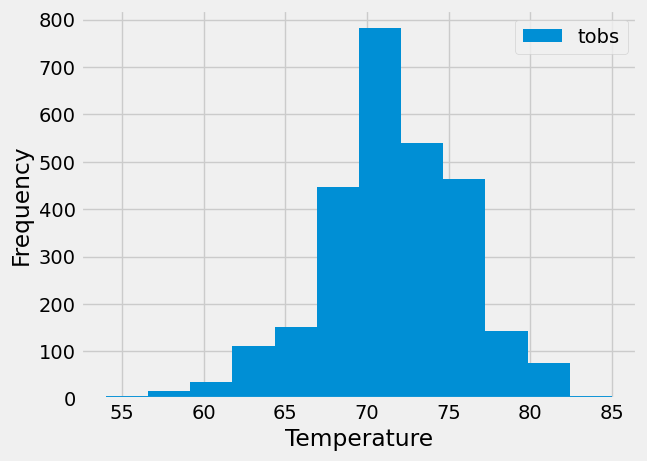

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_histo = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= 2016-8-23).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
active_station_histo_df = pd.DataFrame(active_station_histo)
active_station_histo_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [35]:
# Close Session
session.close()

## Flask App (Section 2)


In [45]:
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

In [46]:
engine = create_engine("sqlite:///..//Resources//hawaii.sqlite")

In [12]:

import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify

Base = automap_base()

Base.prepare(autoload_with=engine)


engine = create_engine("sqlite:///..//Resources//hawaii.sqlite")

app = Flask(__name__)

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/station<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/start<br/>"
        f"/api/v1.0/start/end"
    )
    
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    """Return a list of all precipitation from the last year"""
    prcp_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

    session.close()

    # Convert list of tuples into normal list
    all_prcp = list(np.ravel(prcp_year))

    return jsonify(all_prcp)


@app.route("/api/v1.0/station")
def station():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    # Query the total number of stations
    
    query_station_count = session.query(station).count()
    
   

    return jsonify(query_station_count)

@app.route("/api/v1.0/tobs")
def tobs():
    
    session = Session(engine)
     # Query 
    active_station =  session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= 2016-8-23).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
    
    session.close()
    
    return_jsonify(active_station)
    
@app.route("/api/v1.0/start")
def start():
    
    session = Session(engine)
    user_date = input("Enter a start date in YYYY-MM-DD format: ")
    user_date_end = input("Enter an end date in YYYY-MM-DD format: ")

    session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= user_date).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
    
    query_high = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    query_low = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    query_avg = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    start_date = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= 2016-8-23).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
    response = [query_high, query_low, query_avg] 
    session.close()
    
    return_jsonify(response)
    
@app.route("/api/v1.0/start/end")
def start_end():
    
    session = Session(engine)
    user_date = input("Enter a start date in YYYY-MM-DD format: ")
    user_date_end = input("Enter an end date in YYYY-MM-DD format: ")

    session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= user_date).\
    filter(measurement.date <= user_date_end).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
    
    query_high = session.query(measurement.station, func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    query_low = session.query(measurement.station, func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    query_avg = session.query(measurement.station, func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    start_date = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= 2016-8-23).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.date).all()
    response = [query_high, query_low, query_avg] 
    session.close()
    
    return_jsonify(response)



if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


[2023-08-20 12:26:43,319] ERROR in app: Exception on /api/v1.0/precipitation [GET]
Traceback (most recent call last):
  File "c:\Users\jerem\anaconda3\envs\dev\lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\jerem\anaconda3\envs\dev\lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\jerem\anaconda3\envs\dev\lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\jerem\anaconda3\envs\dev\lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\jerem\AppData\Local\Temp\ipykernel_21016\837781884.py", line 37, in precipitation
    prcp_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()
NameError: name 'measurement' is not defined
127.0.